In [4]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import point

In [16]:
def seidel(a, x, b):
    n=len(a)
    for j in range(0, n):
        d = b[j]
        for i in range (0, n):
            if(j !=i):
                d-=a[j][i] *x [i]
        x[j] = d/ a[j][j]
    return x
G = np.zeros((11,3))
for k in range (0,1):
    n = 3
    a = []
    b = []
    x = [0,0,0]
    a = [[3,2,1],[2,3,-1],[1,-2,4]]
    b = [13+k,0,17]
    for  i in range (0,250):
         x = seidel(a,x,b)
    print(x)
    G[k]=x
    

[8.999999999999991, -6.3999999999999915, -1.1999999999999935]


In [17]:
def seidel(a, x, b):
    n=len(a)
    for j in range(0, n):
        d = b[j]
        for i in range (0, n):
            if(j !=i):
                d-=a[j][i] *x [i]
        x[j] = d/ a[j][j]
    return x
G = np.zeros((11,3))
for k in range (0,11):
    n = 3
    a = []
    b = []
    x = [0,0,0]
    a = [[3,2,1],[2,3,-1],[1,-2,4]]
    b = [13+k,0,17]
    for  i in range (0,250):
         x = seidel(a,x,b)
    print(x)
    G[k]=x

[8.999999999999991, -6.3999999999999915, -1.1999999999999935]
[10.999999999999995, -8.199999999999994, -2.5999999999999956]
[12.999999999999988, -9.999999999999988, -3.9999999999999907]
[14.999999999999991, -11.799999999999992, -5.399999999999993]
[16.99999999999999, -13.599999999999989, -6.799999999999992]
[18.99999999999997, -15.399999999999972, -8.199999999999978]
[20.999999999999986, -17.199999999999985, -9.599999999999989]
[22.999999999999975, -18.999999999999975, -10.999999999999982]
[24.999999999999986, -20.799999999999986, -12.39999999999999]
[26.999999999999982, -22.599999999999984, -13.799999999999986]
[28.999999999999968, -24.399999999999967, -15.199999999999974]


In [18]:
data = { 'k' : [  '0','1', '2','3', '4','5', '6','7', '8', '9','10'],  'x values' : [[ 9.,  -6.4, -1.2],[11.,  -8.2, -2.6],[ 13., -10.,  -4.],[ 15.,  -11.8,  -5.4],[ 17.,  -13.6,  -6.8],[ 19.,  -15.4,  -8.2],[ 21.,  -17.2 , -9.6],[ 23., -19., -11.],[ 25.,   -20.8, -12.4],[ 27. , -22.6 ,-13.8],[ 29.,  -24.4, -15.2]]}
f = pd.DataFrame(data)

In [19]:
f

,k,x values
0,0,"[9.0, -6.4, -1.2]"
1,1,"[11.0, -8.2, -2.6]"
2,2,"[13.0, -10.0, -4.0]"
3,3,"[15.0, -11.8, -5.4]"
4,4,"[17.0, -13.6, -6.8]"
5,5,"[19.0, -15.4, -8.2]"
6,6,"[21.0, -17.2, -9.6]"
7,7,"[23.0, -19.0, -11.0]"
8,8,"[25.0, -20.8, -12.4]"
9,9,"[27.0, -22.6, -13.8]"


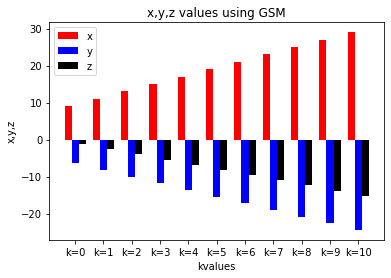

In [20]:
#Assign the N
N = 11
ind = np.arange(N) 
width = 0.25


#Assign x values and plot bar chart with red color  
xvals = [9.0,11,13,15,17,19,21,23,25,27,29]
bar1 = plt.bar(ind, xvals, width, color = 'red')

#Assign y values and plot bar chart with blue color
yvals = [-6.4,-8.2,-10,-11.8,-13.6,-15.4,-17.2,-19,-20.8,-22.6, -24.4]
bar2 = plt.bar(ind+width, yvals, width, color='blue')


#Assign z values and plot bar chart with black color
zvals = [-1.2,-2.6,-4.0,-5.4,-6.8,-8.2,-9.6,-11.0,-12.4,-13.8,-15.2]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'black')
 
#Assign xlabel,ylabeland heading to plot    
plt.xlabel("kvalues")
plt.ylabel('x,y,z')
plt.title("x,y,z values using GSM")
  
plt.xticks(ind+width,['k=0', 'k=1','k=2', 'k=3','k=4', 'k=5','k=6', 'k=7','k=8', 'k=9','k=10'])
plt.legend( (bar1, bar2, bar3), ('x', 'y', 'z') )
plt.show()

In [21]:
a = pd.read_csv('C:/videos/Python/OgallalaFinalData.csv')

In [26]:
a['Percentile'] = a.CLAY.rank(pct = True)

In [27]:
conditions = [
    (a['Percentile'] <= a.Percentile.quantile(0.1)),
    (a['Percentile'] >= a.Percentile.quantile(0.75)),
    (a['Percentile'] > a.Percentile.quantile(0.1>0.75) )
    ]
    

values = ['<=10', '>=75','others']

a['cat'] = np.select(conditions, values)

In [28]:
def f(row):
    if row['NO3Av'] <= 3:
        val = 'LESS OF 3'
    elif row['NO3Av'] >10 :
        val = 'greater of 10'
    else:
        val = 'OTHER'
    return val

In [29]:
a['cat2'] = a.apply(f, axis=1)

KeyError: 'NO3Av'